<a href="https://colab.research.google.com/github/nikhilScripts/Machine-learning/blob/main/module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P3 Heart disease Prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re

In [ ]:
# loading and pre-processing
heart_data = pd.read_csv('/content/heart_disease_uci.csv')
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
heart_data.shape

(920, 16)

In [ ]:
heart_data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
# to drop
heart_data = heart_data.dropna(how= 'any')

In [ ]:
heart_data.shape

(299, 16)

In [ ]:
# replace the null values with a null string
heart_data = heart_data.where(pd.notnull(heart_data),'')

In [ ]:
heart_data['thal'].value_counts()

,count
thal,
normal,164
reversable defect,117
fixed defect,18


0 ----> normal

1 ----> fixed defect

2 ----> reversable defect

In [ ]:
# # 0 ---> normal
# # 1 ---> fixed defect
# # 2 ---> reversable defect
# heart_data.loc[heart_data['thal'] == 'normal', 'thal', ] = 0
# heart_data.loc[heart_data['thal'] == 'fixed defect', 'thal', ] = 1
# heart_data.loc[heart_data['thal'] == 'reversable defect', 'thal', ] = 2

In [ ]:
X = heart_data.drop(columns='thal', axis=1)
Y = heart_data['thal']

In [ ]:
thal_mapping = {
    'normal': 0,  # Assuming 'normal' maps to 0
    'fixed defect': 1,  # Assuming 'fixed defect' maps to 1
    'reversable defect': 2  # Assuming 'reversable defect' maps to 2
}

Y = heart_data['thal'].map(thal_mapping)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through all columns in X
for col in X.columns:
    # Check if the column is of object type (categorical)
    if X[col].dtype == 'object':
        # Attempt to convert the column to numeric
        try:
            X[col] = pd.to_numeric(X[col], errors='raise')
        except ValueError:
            # If conversion fails, proceed with Label Encoding
            X[col] = label_encoder.fit_transform(X[col])
    # If the data type is numeric but mixed with strings, convert to string first
    elif any(isinstance(x, str) for x in X[col]):
         X[col] = X[col].astype(str)
         X[col] = label_encoder.fit_transform(X[col])

In [ ]:
print(X)
print(Y)

      id  age  sex  dataset  cp  trestbps   chol    fbs  restecg  thalch  \
0      1   63    1        0   3     145.0  233.0   True        0   150.0   
1      2   67    1        0   0     160.0  286.0  False        0   108.0   
2      3   67    1        0   0     120.0  229.0  False        0   129.0   
3      4   37    1        0   2     130.0  250.0  False        1   187.0   
4      5   41    0        0   1     130.0  204.0  False        0   172.0   
..   ...  ...  ...      ...  ..       ...    ...    ...      ...     ...   
299  300   68    1        0   0     144.0  193.0   True        1   141.0   
300  301   57    1        0   0     130.0  131.0  False        1   115.0   
301  302   57    0        0   1     130.0  236.0  False        0   174.0   
508  509   47    1        1   0     150.0  226.0  False        1    98.0   
748  749   56    1        2   0     120.0  100.0  False        1   120.0   

     exang  oldpeak  slope   ca  num  
0    False      2.3      0  0.0    0  
1     Tru

Splitting the data into training and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(299, 15) (239, 15) (60, 15)


In [ ]:
# model Training
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Accuracy Score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7154811715481172


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.6833333333333333


In [ ]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num
0,1,63,1,0,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0
1,2,67,1,0,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,2
2,3,67,1,0,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,1
3,4,37,1,0,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,0
4,5,41,0,0,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,0


In [ ]:
# Building a predictive system
input_data = (0,1,63,	1,	0,	3,	145.0,	233.0,	0,	150.0, 0,2.3,	0,	0.0,	0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
elif (prediction[0]== 1):
  print('The Person has Heart Disease ')
elif (prediction[0]== 2):
  print('The Person has Heart Disease but its Reversible')

[2]
The Person has Heart Disease but its Reversible


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# P4 Loan_prediction

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
loan_data = pd.read_csv('/content/archive (2).zip')

FileNotFoundError: [Errno 2] No such file or directory: '/content/archive (2).zip'

In [ ]:
loan_data.head()

In [ ]:
loan_data.shape

In [ ]:
loan_data.isnull().sum()

In [ ]:
loan_data = loan_data.dropna()
loan_data.isnull().sum()

In [ ]:
# label encoding
loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
loan_data.head()

In [ ]:
loan_data['Dependents'].value_counts()

In [ ]:
loan_data.replace({"Dependents":{'3+':4}},inplace=True)
loan_data['Dependents'].value_counts()

In [ ]:
# convert categorical columns to numerical values
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
loan_data.head()

In [ ]:
X = loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_data['Loan_Status']

In [ ]:
X.head()

In [ ]:
print(X)

In [ ]:
print(Y)

train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

using support vector machine

In [ ]:
classifier = svm.SVC(kernel='linear')
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

In [ ]:
# modle evaluation
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)

In [ ]:
# Building a predictive system
input_data = (1,1,	1,	1,	0	,4583,	1508.0,	128.0,	360.0,	1.0	,0)  # Example input data
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Loan is Rejected')
else:
  print('The Loan is Approved')

#1 ML models Linear regression

In [ ]:
import numpy as np

Linear Regression

In [ ]:
class Linear_Regression():
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    # no. of training ex. and no. of features
    self.m, self.n = X.shape
    # init weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    # implementing  gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self,):
    Y_prediction = self.predict(self.X)
    # calculate gradients
    dw = - (2*(self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m
    # update weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self, X):
    return X.dot(self.w) + self.b

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
salary_data = pd.read_csv('/content/salary_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/salary_data.csv'

In [ ]:
salary_data.head()

In [ ]:
salary_data.shape

In [ ]:
salary_data.isnull().sum()

In [ ]:
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, 1].values

In [ ]:
print(X)
print(Y)

splitting the data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 2)

In [ ]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
# printing the parameter values(weights and bias)
print('weight', model.w[0])
print('bias', model.b)

In [ ]:
# y = 9514(X) + 23697

# salary = 9514(experience) + 23697
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

In [ ]:
# visualizing the predicted values and actual values
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Test Data)')
plt.show()

# 2  Logistic Regression

In [ ]:
import numpy as np

In [ ]:
import numpy as np

class Logistic_Regression():
    #declaring hyperparameters
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations


    def fit(self, X, Y):
        # no. of training ex. and no. of features
        self.m, self.n = X.shape
        # init weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        # implementing  gradient descent
        for i in range(self.no_of_iterations): # Use self.no_of_iterations
            self.update_weights()


    def update_weights(self): # Added indentation
        # y_hat formula
        Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))
        # gradients
        dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
        db = (1/self.m)*np.sum(Y_hat - self.Y)
        #updating weights and bias
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db


    def predict(self, X): # Added indentation
        Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
        Y_pred = np.where( Y_pred > 0.5, 1, 0)
        return Y_pred

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/datasets/diabetes.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/datasets/diabetes.csv'

In [ ]:
diabetes_data.head()

In [ ]:
diabetes_data.shape

In [ ]:
diabetes_data.isnull().sum()

In [ ]:
diabetes_data['Outcome'].value_counts()

0 --> non diabetic

1 --> diabetic

In [ ]:
# seprating data and label
features = diabetes_data.drop(columns='Outcome', axis=1)
target = diabetes_data['Outcome']

In [ ]:
print(features)
print(target)

In [ ]:
scaler = StandardScaler()
scaler.fit(features)
standardized_data = scaler.transform(features)
print(standardized_data)

In [ ]:
features = standardized_data
target = diabetes_data['Outcome']

In [ ]:
print(features)
print(target)

In [ ]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=2)

In [ ]:
print(features.shape, X_train.shape, X_test.shape)

In [ ]:
classifier = Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)

In [ ]:
classifier.fit(X_train, Y_train)

In [ ]:
# evalution
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on Training data : ', training_data_accuracy)

In [ ]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test data : ', test_data_accuracy)

In [ ]:
# Building a predictive system
input_data = (5,166,72,19,175,25.8,0.587,51)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

# 3 SVM

In [ ]:
import numpy as np

In [ ]:
import numpy as np

class SVM_classifier():

  # initiating the hyperparameters
  def __init__(self, learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  # fitting the dataset to svm classifier
  def fit(self, X, Y):
    # m --> no of rows or data points
    # n --> no of columns or input features
    self.m, self.n = X.shape
    # initialize weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    # implement gradient descent algorithm
    for i in range(self.no_of_iterations):
      self.update_weights()

  # function for updating the weight and bias
  def update_weights(self):
    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)
    # gradient descent
    for index, x_i in enumerate(self.X):
      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
      if condition:
        dw = (2 * self.lambda_parameter) * self.w
        db = 0
      else:
        dw = (2 * self.lambda_parameter) * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]

      # update weights and bias
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

  # predict the label for a given input value
  def predict(self, X):
    output = np.dot(X, self.w) - self.b
    predicted_labels = np.sign(output)
    y_hat = np.where(predicted_labels <= -1, 0, 1)
    return y_hat


In [ ]:
 import pandas as pd
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score

In [ ]:
# data collection and pre processing
from google.colab import drive
drive.mount('/content/drive')
diabetes_data = pd.read_csv('/content/drive/MyDrive/datasets/diabetes.csv')

In [ ]:
diabetes_data.head()

In [ ]:
diabetes_data.shape

In [ ]:
diabetes_data['Outcome'].value_counts()

In [ ]:
# 0 ---> non diabetic
# 1 ---> diabetic
features = diabetes_data.drop(['Outcome'], axis = 1)
target = diabetes_data['Outcome']

In [ ]:
print(features)
print(target)

In [ ]:
scaler = StandardScaler()
scaler.fit(features)
standardized_data = scaler.transform(features)
print(standardized_data)

In [ ]:
features = standardized_data
target = diabetes_data['Outcome']

In [ ]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=2)
print(features.shape, X_train.shape, X_test.shape)

In [ ]:
# traing model
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)


In [ ]:
classifier.fit(X_train, Y_train)

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on Training data : ', training_data_accuracy)

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test data : ', test_data_accuracy)

In [ ]:
input_data = (1,	85,	66,	29,	0,	26.6,	0.351,	31)
# change the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)
if prediction[0] == 0:
  print('The person is not diabetic')
else:
  print('The person is diabetic')

# 4 Lasso Regression

In [ ]:
import numpy as np
class lasso_Regression():
  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  def fit(self, X, Y):
    # m --> no of rows or data points
    # n --> no of columns or input features
    self.m, self.n = X.shape
    # initialize weight and bias
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    # implement gradient descent algorithm
    for i in range(self.no_of_iterations):
      self.update_weights()


  # fn for updating weight and bias va;ue
  def update_weights(self):
    Y_prediction = self.predict(self.X)
    # gradients dw and db
    dw = np.zeros(self.n)
    for i in range(self.n):
      if self.w[i] > 0:
        dw[i] = (-(2*(self.X[:,i].dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m)
      else :
        dw[i] = (-(2*(self.X[: i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction) / self.m
    # update weights and bias
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self,X):
    return X.dot(self.w) + self.b



# 5 K-Fold Cross Validation


In [ ]:
# unziping file
!unzip /content/dataset-20241022T211531Z-001.zip -d /content/

Archive:  /content/dataset-20241022T211531Z-001.zip
replace /content/dataset/calories.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# data collection
heart_data = pd.read_csv('/content/dataset/heart.csv')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart_data['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
# 1 --> Defective heart
# 0 --> Healthy heart
X = heart_data.drop(['target'], axis = 1)
Y = heart_data['target']

In [ ]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

Comparing train test split

In [ ]:
def compare_models_train_test():
  for model in models:
    model.fit(X_train, Y_train)
    test_data_prediction = model.predict(X_test)
    accuracy = accuracy_score(Y_test, test_data_prediction)
    print('Accuracy score of the ', model, ' = ', accuracy)

In [ ]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.7704918032786885
Accuracy score of the  SVC(kernel='linear')  =  0.7704918032786885
Accuracy score of the  KNeighborsClassifier()  =  0.6557377049180327
Accuracy score of the  RandomForestClassifier()  =  0.7868852459016393


Cross Validation

cv for lr

In [ ]:
# cv for logistic regression
cv_score_lr = cross_val_score(LogisticRegression(max_iter = 1000), X,Y, cv = 5)

KeyboardInterrupt: 

In [ ]:
print(cv_score_lr)

In [ ]:
mean_accuracy_lr_percentage = sum(cv_score_lr)/len(cv_score_lr)*100

In [ ]:
print(round(mean_accuracy_lr_percentage,2))

cv for svm

In [ ]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), X,Y, cv = 5)

In [ ]:
print(cv_score_svc)

In [ ]:
mean_accuracy_svc_percentage = sum(cv_score_svc)/len(cv_score_svc)*100
print(round(mean_accuracy_svc_percentage,2))

Comparing cross validation

In [ ]:
def compare_models_cross_validation():
  for model in models:
    cv_score = cross_val_score(model, X,Y, cv = 5)
    mean_accuracy_percentage = sum(cv_score)/len(cv_score)*100
    mean_accuracy_percentage = round(mean_accuracy_percentage,2)
    print('Cross Validation accuracies for the ', model, ' = ', cv_score)
    print('Accuracy % of the ', model, ' = ', mean_accuracy_percentage)
    print("\n")


In [ ]:
compare_models_cross_validation()

# 6 Grid Search and Random Search

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

In [ ]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
data_frame.head()

In [ ]:
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
data_frame.head()

In [ ]:
data_frame.shape

In [ ]:
data_frame.isnull().sum()

In [ ]:
data_frame['label'].value_counts()

1 --> Benign
0 --> Malignant

In [ ]:
X = data_frame.drop(['label'], axis = 1)
Y = data_frame['label']

In [ ]:
print(X)
print(Y)

In [ ]:
X = np.asarray(X)
y = np.asarray(Y)

GridSearch is used to determine the best parameters for our model

In [ ]:
model = SVC()

In [ ]:
parameters = {'kernel': ['linear', 'poly', 'rbf','sigmoid'], 'C': [1,5,10,20]}

In [ ]:
# grid search
classifier = GridSearchCV(model, parameters, cv = 5)
classifier.fit(X,Y)

In [ ]:
GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [1, 5, 10, 20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
classifier.cv_results_

In [ ]:
# best parameters
best_parameters = classifier.best_params_
print(best_parameters)

In [ ]:
highest_score = classifier.best_score_
print(highest_score,2)
print(classifier.best_estimator_)

In [ ]:
result = pd.DataFrame(classifier.cv_results_)
result.head()

In [ ]:
grid_search_result = result[['param_C', 'param_kernel', 'mean_test_score']]
grid_search_result

**RandomSearchCV**

In [ ]:
model = SVC()
parameters = {'kernel': ['linear', 'poly', 'rbf','sigmoid'], 'C': [1,5,10,20]}

In [ ]:
classifier = RandomizedSearchCV(model, parameters, cv = 5)
classifier.fit(X,Y)

In [ ]:
RandomizedSearchCV(cv=5, estimator=SVC(), param_distributions={'C': [10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                   random_state=None)

In [ ]:
classifier.cv_results_

In [ ]:
best_parameters = classifier.best_params_
print(best_parameters)

In [ ]:
highest_score = classifier.best_score_
print(highest_score)

In [ ]:
result = pd.DataFrame(classifier.cv_results_)
result.head()

In [ ]:
random_search_result = result[['param_C', 'param_kernel', 'mean_test_score']]
random_search_result

# 7 Model Selection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
heart_data = pd.read_csv('/content/drive/MyDrive/aiml data/dataset/heart.csv')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart_data['target'].value_counts()

,count
target,
1,165
0,138


1 --> Defective heart

0 --> Healthy heart

In [ ]:
X = heart_data.drop(['target'], axis = 1)
Y = heart_data['target']

In [ ]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
X = np.asarray(X)
Y = np.asarray(Y)

Comparing models with default hyperparameters using **Cross Validation**



In [ ]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state = 0)]

In [ ]:
def compare_models_cross_validation():
  for model in models:
    cv_score = cross_val_score(model, X,Y, cv = 5)
    mean_accuracy_percentage = sum(cv_score)/len(cv_score)*100
    mean_accuracy_percentage = round(mean_accuracy_percentage,2)
    print('Cross Validation accuracies for the ', model, ' = ', cv_score)
    print('Accuracy score of the', model, '=', mean_accuracy_percentage)
    print('\n')

In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for the  LogisticRegression(max_iter=1000)  =  [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy score of the LogisticRegression(max_iter=1000) = 82.83


Cross Validation accuracies for the  SVC(kernel='linear')  =  [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy score of the SVC(kernel='linear') = 82.83


Cross Validation accuracies for the  KNeighborsClassifier()  =  [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy score of the KNeighborsClassifier() = 64.39


Cross Validation accuracies for the  RandomForestClassifier(random_state=0)  =  [0.85245902 0.90163934 0.81967213 0.81666667 0.8       ]
Accuracy score of the RandomForestClassifier(random_state=0) = 83.81




Comparing the models with different Hyperparameter using **GridSearchCV**

In [ ]:
model_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state = 0)]

In [ ]:
# creating dictionary storing all hyperparameters of all models
model_hyperparameters = {


    'log_reg_hyperparameters': {

        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {

        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {

        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {

        'n_estimators' : [10, 20, 50, 100]
    }
}

In [ ]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters'])


In [ ]:
model_hyperparameters['log_reg_hyperparameters']

{'C': [1, 5, 10, 20]}

In [ ]:
model_key = list(model_hyperparameters.keys())
print(model_key)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [ ]:
type(model_key)

list

In [ ]:
model_key[0]

'log_reg_hyperparameters'

In [ ]:
model_hyperparameters[model_key[0]]

{'C': [1, 5, 10, 20]}

Applying GridSearchCV


In [ ]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_key[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X,Y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [ ]:
ModelSelection(model_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
---------------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.831585,{'C': 5}
1,SVC(),0.828306,"{'C': 1, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.643880,{'n_neighbors': 5}
3,RandomForestClassifier(random_state=0),0.838087,{'n_estimators': 100}


# 8 Precision,Recall, F1_Score

In [ ]:
# this part is more into accuracy and these are just need to be imported and called after train test split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# P5 Big Mart Sales

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
mart_data = pd.read_csv('/content/drive/MyDrive/aiml data/dataset/big_mart_data.csv')

In [ ]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
mart_data.shape

(8523, 12)

In [ ]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# fill missing values
mart_data['Item_Weight'].mean()

12.857645184135976

In [ ]:
mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(), inplace = True)

<ipython-input-50-07f275fa698b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(), inplace = True)


In [ ]:
mart_data['Outlet_Size'].mode()

,Outlet_Size
0,Medium


In [ ]:
mode_of_Outlet_size = mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
miss_values = mart_data['Outlet_Size'].isnull()

In [ ]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
mart_data.loc[miss_values, 'Outlet_Size'] = mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [ ]:
sns.set()

<ipython-input-51-f857c564ca0d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data['Item_Weight'])


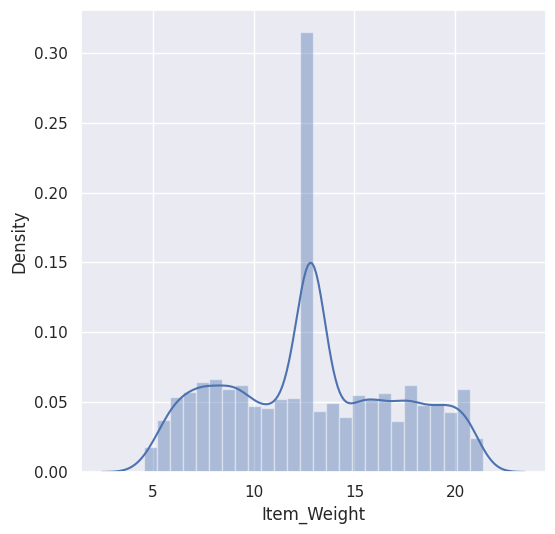

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_Weight'])
plt.show()

<ipython-input-52-115184722fca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data['Item_Visibility'])


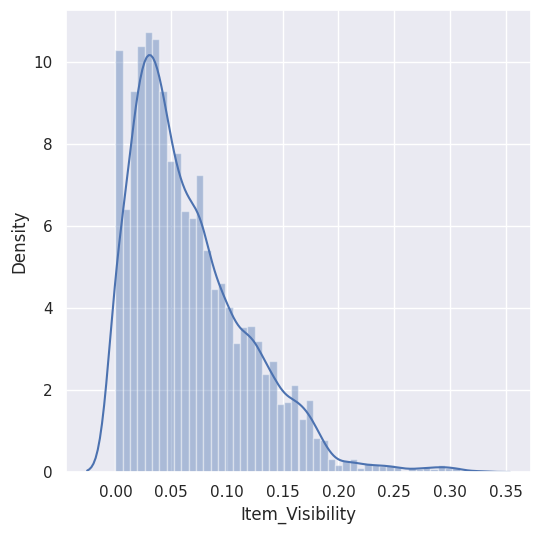

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_Visibility'])
plt.show()

<ipython-input-53-a880a7e121e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data['Item_MRP'])


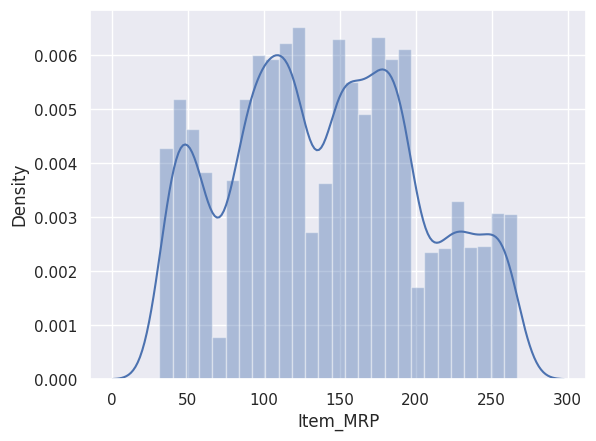

In [ ]:
sns.distplot(mart_data['Item_MRP'])
plt.show()

<ipython-input-54-46d8cccf3c17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data['Item_Outlet_Sales'])


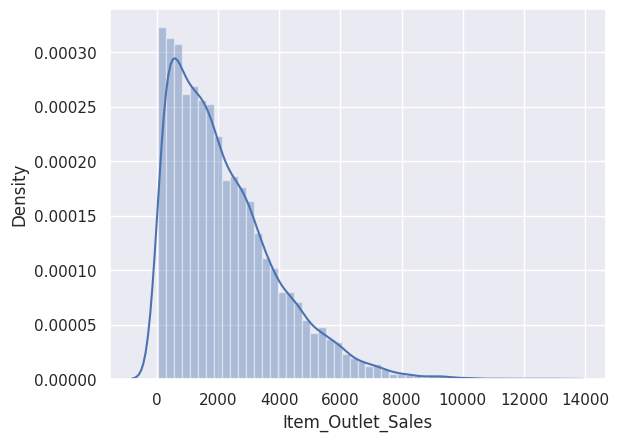

In [ ]:
sns.distplot(mart_data['Item_Outlet_Sales'])
plt.show()

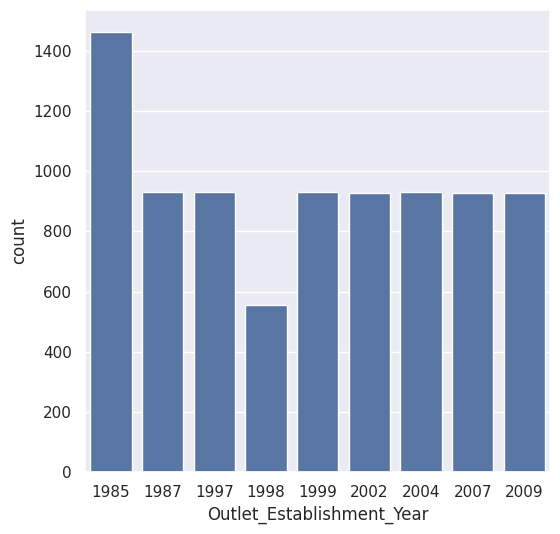

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = mart_data)
plt.show()

**Data pre-processing**

In [ ]:
mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
mart_data.replace({'Item_Fat_Content': {'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular' }}, inplace = True)

In [ ]:
mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
# label encoding
encoder = LabelEncoder()

In [ ]:
columns_to_encode = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
mart_data[columns_to_encode] = mart_data[columns_to_encode].apply(encoder.fit_transform)

In [ ]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
X = mart_data.drop(['Item_Outlet_Sales'], axis = 1)
Y = mart_data['Item_Outlet_Sales']

In [ ]:
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [ ]:
# XGBoost Regressor
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_data_prediction = regressor.predict(X_train)

NameError: name 'test_data_prediction' is not defined

In [ ]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


In [ ]:
test_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692


In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print('Mean Absolute Error = ', mae)

Mean Absolute Error =  866.2585390253303


# P6 Beast_Cancer_Prediction

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
data_frame = pd.DataFrame(cancer_dataset.data, columns = cancer_dataset.feature_names)
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_frame['label'] = cancer_dataset.target

In [ ]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
data_frame.shape

(569, 31)

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
data_frame['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
X = data_frame.drop(['label'], axis = 1)
Y = data_frame['label']

In [ ]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9472527472527472


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9298245614035088


In [ ]:
# model to test cancer
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1]
The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Working on kaggle competition dataset


In [ ]:
print("hello")

hello


In [ ]:
!pip install kaggle -q

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Extract the comressed dataset
from zipfile import ZipFile
dataset = '/content/house-prices-advanced-regression-techniques.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('data set is extracted')


data set is extracted


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


<Axes: >

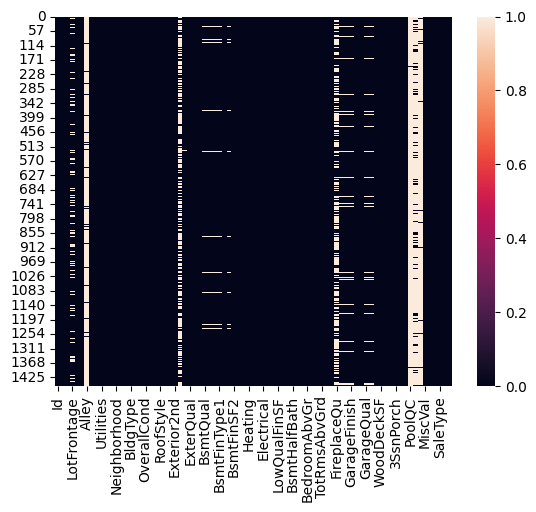

In [ ]:
sns.heatmap(df.isnull()) #Cheaking all null values

In [ ]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [ ]:
df.drop(['Alley'], axis = 1, inplace = True)

In [ ]:
df.drop(['GarageYrBlt'],axis = 1, inplace=True)

In [ ]:
df['BstmCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [ ]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

KeyError: "['PoolQC', 'Fence', 'MiscFeature'] not found in axis"

In [ ]:
df.drop(['Id'], axis = 1, inplace = True)

In [ ]:
df.shape

(1460, 76)

In [ ]:
df.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
YrSold,0
SaleType,0
SaleCondition,0
SalePrice,0


<Axes: >

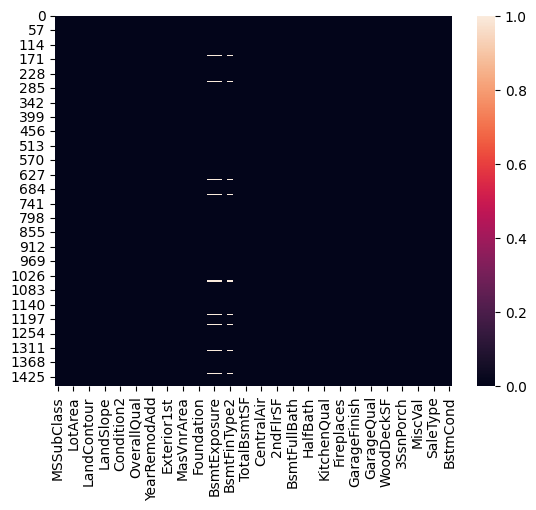

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df['BstmExposure'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

<Axes: >

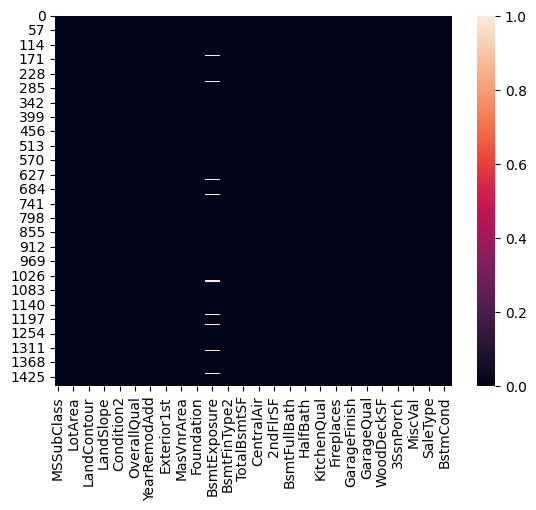

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1421, 77)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1421 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1421 non-null   int64  
 1   MSZoning       1421 non-null   object 
 2   LotFrontage    1421 non-null   float64
 3   LotArea        1421 non-null   int64  
 4   Street         1421 non-null   object 
 5   LotShape       1421 non-null   object 
 6   LandContour    1421 non-null   object 
 7   Utilities      1421 non-null   object 
 8   LotConfig      1421 non-null   object 
 9   LandSlope      1421 non-null   object 
 10  Neighborhood   1421 non-null   object 
 11  Condition1     1421 non-null   object 
 12  Condition2     1421 non-null   object 
 13  BldgType       1421 non-null   object 
 14  HouseStyle     1421 non-null   object 
 15  OverallQual    1421 non-null   int64  
 16  OverallCond    1421 non-null   int64  
 17  YearBuilt      1421 non-null   int64  
 18  YearRemodAdd 

Handling all categorical features(objects)

In [ ]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
len(columns)

39

In [ ]:
def category_onehot_multcols(multcolumns):
    df_final = final_df # Start with a copy of the original DataFrame

    for field in multcolumns:
        print(field)
        df_onehot = pd.get_dummies(df_final[field], drop_first=True)  # One-hot encode the current field
        df_final = pd.concat([df_final.drop(field, axis=1), df_onehot], axis=1)  # Drop the original field and add the one-hot encoded columns

    return df_final


In [ ]:
main_df = df.copy()

In [ ]:
test_df = pd.read_csv('/content/test.csv')

In [ ]:
test_df.shape

(1459, 80)

In [ ]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
final_df = pd.concat([df,test_df],axis=0)

In [ ]:
final_df['SalePrice']

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1454,NaN
1455,NaN
1456,NaN
1457,NaN


In [ ]:
final_df.shape

(2880, 182)

In [ ]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [ ]:
final_df.shape

(2880, 242)

In [ ]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.shape

(2880, 182)

In [ ]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,True,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,True,True,False,False,False,False,True,False


In [ ]:
df_train = final_df.iloc[:1420,:]
df_test = final_df.iloc[1420:,:]

In [ ]:
df_train.shape

(1420, 182)

In [ ]:
df_test.shape

(1420, 182)

In [ ]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

<ipython-input-200-e7e48ed8ae1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'],axis=1,inplace=True)


In [ ]:
X_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train['SalePrice']

Prediction and selcting Algorithm

In [ ]:
import xgboost
classifier=xgboost.XGBRegressor()

In [ ]:
regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

In [ ]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
!pip install scikit-learn # install scikit-learn if you haven't already
from sklearn.model_selection import RandomizedSearchCV # import the class

regressor=xgboost.XGBRegressor()

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators = [100, 500, 900, 1100, 1500]
!pip install scikit-learn # install scikit-learn if you haven't already
from sklearn.model_selection import RandomizedSearchCV # import the class

regressor=xgboost.XGBRegressor()

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05, 0.1, 0.15, 0.20]

In [ ]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=42)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify object columns
object_cols = X_train.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode object columns
for col in object_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])

# Now you can fit the model:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
random_cv.best_estimator_

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:

df_Test.drop(['SalePrice'],axis=1).head()

In [ ]:

y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))

In [ ]:
y_pred

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)